# **Import Libraries**

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import average_precision_score, precision_score, recall_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import IPython.display as ipd
from keras.models import load_model
from PIL import Image
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

# **Upload Dataset**

In [36]:
data = pd.read_csv("/content/final_data.csv")
data.head()

,age,marital,children,smoker,pets,disease,disease_,education,work_load,family,traffics,income_need,love_work,sociality,tough_leader,quit,tough_work,absent
0,19.0,single,n,n,n,y,n,bachelor,moderate,n,y,n,y,y,y,n,n,1
1,19.0,single,n,n,n,n,n,other,moderate,n,y,n,n,n,y,n,n,1
2,40.0,married,y,y,n,n,n,master,low,n,n,y,y,n,n,n,y,0
3,36.0,married,y,n,n,n,n,bachelor,high,y,n,y,n,n,y,n,y,1
4,30.0,single,n,y,n,y,n,bachelor,low,n,n,y,y,y,y,n,y,0


# **Pre-processing**

In [37]:
data.loc[data['children'] == 'n', 'children'] = -1
data.loc[data['children'] == 'y', 'children'] = 1
data.loc[data['smoker'] == 'n', 'smoker'] = -1
data.loc[data['smoker'] == 'y', 'smoker'] = 1
data.loc[data['pets'] == 'n', 'pets'] = -1
data.loc[data['pets'] == 'y', 'pets'] = 1
data.loc[data['disease'] == 'n', 'disease'] = -1
data.loc[data['disease'] == 'y', 'disease'] = 1
data.loc[data['disease_'] == 'n', 'disease_'] = -1
data.loc[data['disease_'] == 'y', 'disease_'] = 1
data.loc[data['family'] == 'n', 'family'] = -1
data.loc[data['family'] == 'y', 'family'] = 1
data.loc[data['traffics'] == 'n', 'traffics'] = -1
data.loc[data['traffics'] == 'y', 'traffics'] = 1
data.loc[data['income_need'] == 'n', 'income_need'] = -1
data.loc[data['income_need'] == 'y', 'income_need'] = 1
data.loc[data['love_work'] == 'n', 'love_work'] = -1
data.loc[data['love_work'] == 'y', 'love_work'] = 1
data.loc[data['sociality'] == 'n', 'sociality'] = -1
data.loc[data['sociality'] == 'y', 'sociality'] = 1
data.loc[data['tough_leader'] == 'n', 'tough_leader'] = -1
data.loc[data['tough_leader'] == 'y', 'tough_leader'] = 1
data.loc[data['quit'] == 'n', 'quit'] = -1
data.loc[data['quit'] == 'y', 'quit'] = 1
data.loc[data['tough_work'] == 'n', 'tough_work'] = -1
data.loc[data['tough_work'] == 'y', 'tough_work'] = 1
lst = ['marital', 'education', 'work_load']
remove = list()
for i in lst:
    if (data[i].dtype == np.str or data[i].dtype == np.object):
        for j in data[i].unique():
            data[i+'_'+j] = np.where(data[i] == j,1,-1)
        remove.append(i)
data = data.drop(remove, axis=1)
continuous_var = ['age']
minVec = data[continuous_var].min().copy()
maxVec = data[continuous_var].max().copy()
data[continuous_var] = (data[continuous_var]-minVec)/(maxVec-minVec)
data.head()

,age,children,smoker,pets,disease,disease_,family,traffics,income_need,love_work,sociality,tough_leader,quit,tough_work,absent,marital_single,marital_married,education_bachelor,education_other,education_master,work_load_moderate,work_load_low,work_load_high
0,0.000000,-1,-1,-1,1,-1,-1,1,-1,1,1,1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1
1,0.000000,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,1,-1,-1
2,0.777778,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1,0,-1,1,-1,-1,1,-1,1,-1
3,0.629630,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,1,1,-1,1,1,-1,-1,-1,-1,1
4,0.407407,-1,1,-1,1,-1,-1,-1,1,1,1,1,-1,1,0,1,-1,1,-1,-1,-1,1,-1


# **Over-sampling**

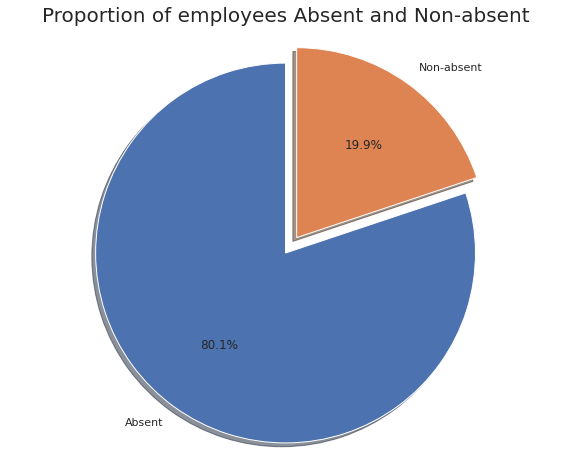

In [38]:
labels = 'Absent', 'Non-absent'
sizes = [data.absent[data['absent']==1].count(), data.absent[data['absent']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of employees Absent and Non-absent", size = 20)
plt.show()
y = data['absent'].values
x = data.drop(columns = ['absent'],axis=1)
X, Y = SMOTE().fit_sample(x, y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

# **Machine Learning Models**

In [39]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.6025641025641025
Precision: 0.6774193548387096
Recall: 0.5
F1: 0.5753424657534247
Area under precision Recall: 0.607940446650124


In [40]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.7051282051282052
Precision: 0.7435897435897436
Recall: 0.6904761904761905
F1: 0.7160493827160495
Area under precision Recall: 0.6800976800976801


In [41]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.7564102564102564
Precision: 0.8108108108108109
Recall: 0.7142857142857143
F1: 0.759493670886076
Area under precision Recall: 0.7329967329967331


In [42]:
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.782051282051282
Precision: 0.7777777777777778
Recall: 0.8333333333333334
F1: 0.8045977011494253
Area under precision Recall: 0.7378917378917379


# **Artifitial Neural Network Model**

In [43]:
model = Sequential()
model.add(Dense(32, input_dim=22, kernel_initializer='uniform', activation='relu'))
model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation= "sigmoid"))

model.compile(optimizer=keras.optimizers.Adam(lr = 0.001), loss = 'binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)
mc = ModelCheckpoint('model', monitor='val_loss', mode='min', verbose=2)
history = model.fit(X_train, y_train, callbacks = [es,mc], batch_size = 4, epochs=500, validation_data = (X_test, y_test))
prediction = model.predict(X_test)
#accuracy_score(pred, y_test)
accuracy = accuracy_score(y_test, prediction.round())*100
print(accuracy)

Train on 180 samples, validate on 78 samples
Epoch 1/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6933 - acc: 0.4611 - val_loss: 0.6932 - val_acc: 0.4615

Epoch 00001: saving model to model
Epoch 2/500
180/180 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.4500 - val_loss: 0.6932 - val_acc: 0.4615

Epoch 00002: saving model to model
Epoch 3/500
180/180 [==============================] - 0s 1ms/step - loss: 0.6931 - acc: 0.5167 - val_loss: 0.6933 - val_acc: 0.4615

Epoch 00003: saving model to model
Epoch 4/500
180/180 [==============================] - 0s 1ms/step - loss: 0.6925 - acc: 0.5556 - val_loss: 0.6919 - val_acc: 0.5897

Epoch 00004: saving model to model
Epoch 5/500
180/180 [==============================] - 0s 1ms/step - loss: 0.6847 - acc: 0.6611 - val_loss: 0.6715 - val_acc: 0.6410

Epoch 00005: saving model to model
Epoch 6/500
180/180 [==============================] - 0s 1ms/step - loss: 0.6273 - acc: 0.7389 - val_loss: 0.

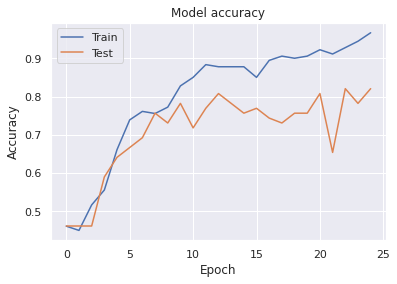

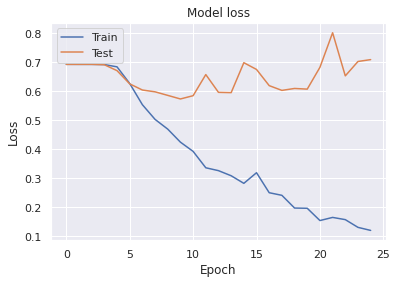

In [46]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()